Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


Start simulation:

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
SIM_TIME = 30
NUMBER_RESOURCES = 5
NUMBER_RNA_POLYMERASES = 3
NUMBER_RIBOSOMES = 2
RANDOM_SEED = 42

protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    random_seed=RANDOM_SEED, 
    verbose=False
    )

Simulation environment initialized


In [4]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started:
Time 0.0000: DNA Sequence 0 requesting to start synthesis
Time 0.0000: DNA Sequence 0 synthesize started
Time 0.1113: DNA Sequence 1 requesting to start synthesis
Time 0.1113: DNA Sequence 1 synthesize started
Time 0.1929: DNA Sequence 2 requesting to start synthesis
Time 0.1929: DNA Sequence 2 synthesize started
Time 0.8488: DNA Sequence 3 requesting to start synthesis
Time 0.8488: DNA Sequence 3 synthesize started
Time 0.8488: DNA Sequence 3 synthetis ended
Time 1.2221: DNA Sequence 4 requesting to start synthesis
Time 1.2221: DNA Sequence 4 synthesize started
Time 1.2221: DNA Sequence 4 synthetis ended
Time 1.5601: DNA Sequence 5 requesting to start synthesis
Time 1.5601: DNA Sequence 5 synthesize started
Time 1.8098: DNA Sequence 6 requesting to start synthesis
Time 1.8098: DNA Sequence 6 synthesize started
Time 1.8098: DNA Sequence 6 synthetis ended
Time 1.9545: DNA Sequence 7 requesting to start synthesis
Time 1.9545: DNA Sequence 7 synthesize started
Time 2.9

Results:

In [5]:
results_df = protein_synthesis_process.dna_sequences_df

In [6]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 10
Number of DNA sequence not traslated: 13


In [7]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized']]

,polypeptides_chains,number_of_proteins_synthesized
6218,[NH2-MVSVMTRVVPYRLVIKVYVQKKPIFAGVMIKFLTIVILL-C...,2
21371,[NH2-MDLDRLDASTRDHTFVTMATDVPLLLSLHTASDTRASDRLL...,5
33727,[NH2-MPHLPMSDVRYLSESRYMLDVVVRRVVRVVRGLMAGSHVRE...,3
38095,"[NH2-MQKPRWGLVYYRHKLVFRQSLY-COOH, NH2-MQKPRWGL...",2
63560,[NH2-MRVGYIPRLFQSTCPTTPIKNILYVTGGQVELSSTANGRSH...,1
84686,"[NH2-M-COOH, NH2-M-COOH, NH2-M-COOH]",3
104437,[NH2-MYHCLDLDMLRKRATFL-COOH],1
161991,"[NH2-MASQVMVVGLVVRRPTDTNRNWSRKS-COOH, NH2-MASQ...",7
167621,"[NH2-MVFVPSFGKHSLDEGTGLWRTIRGGGL-COOH, NH2-MVF...",6
178012,"[NH2-MVRVVLLLDC-COOH, NH2-MVRVVLLLDC-COOH]",2


Plot results

In [8]:
from src.utils import barplot_proteins_number, plot_cumulative_proteins_number_over_time, plot_proteins_number_over_time

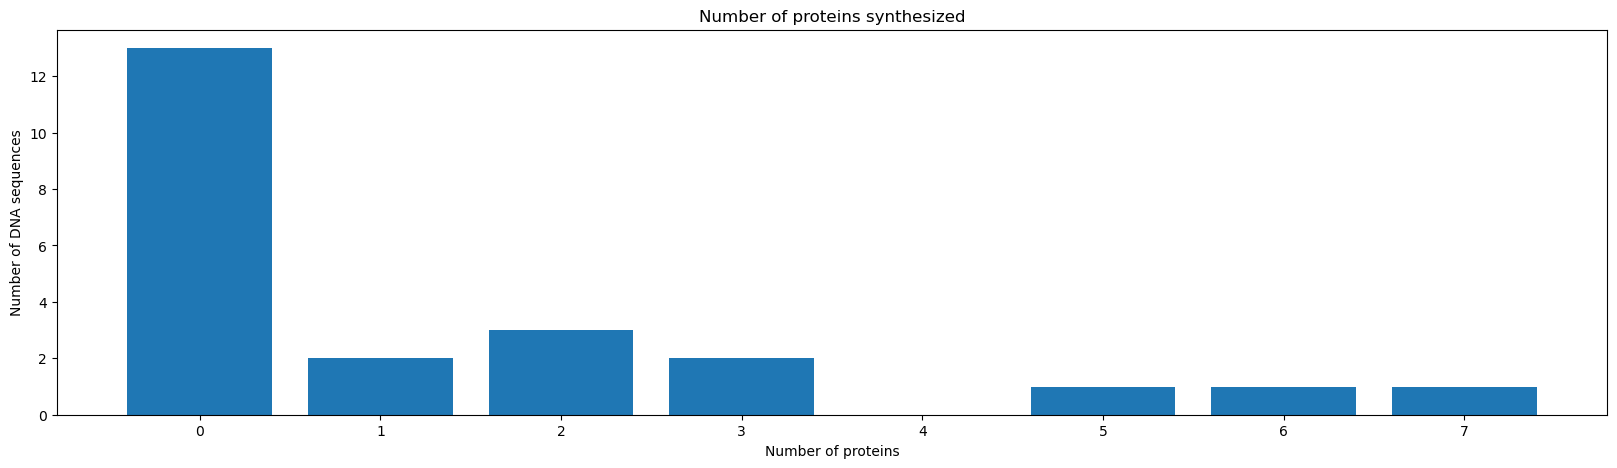

In [9]:
barplot_proteins_number(results_df)

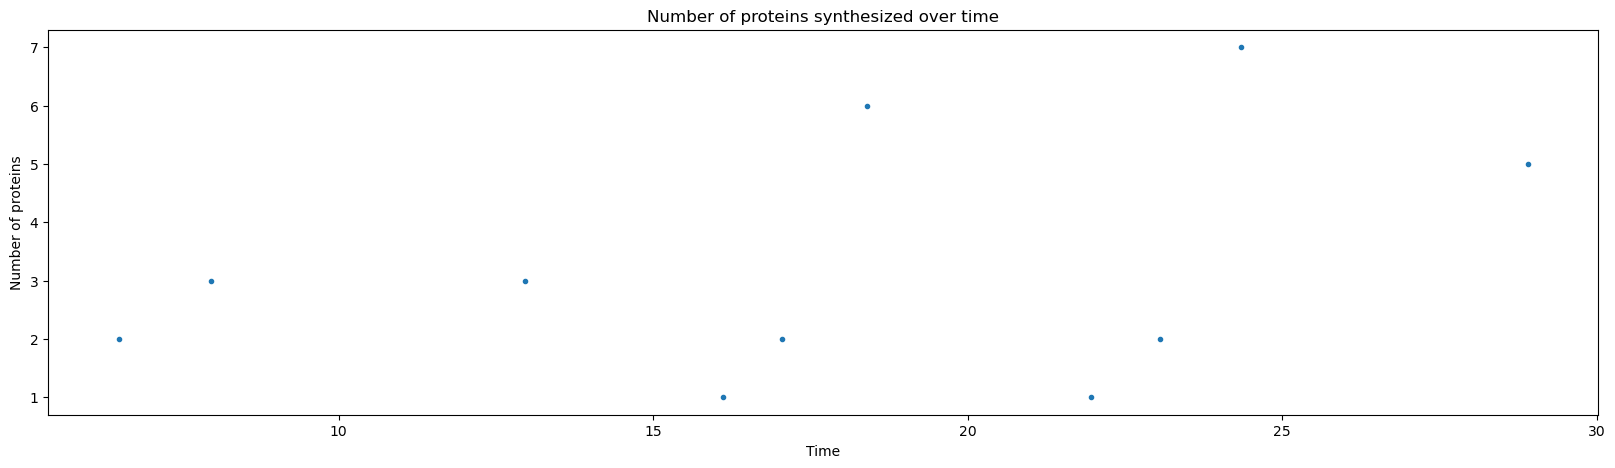

In [10]:
plot_proteins_number_over_time(results_df)

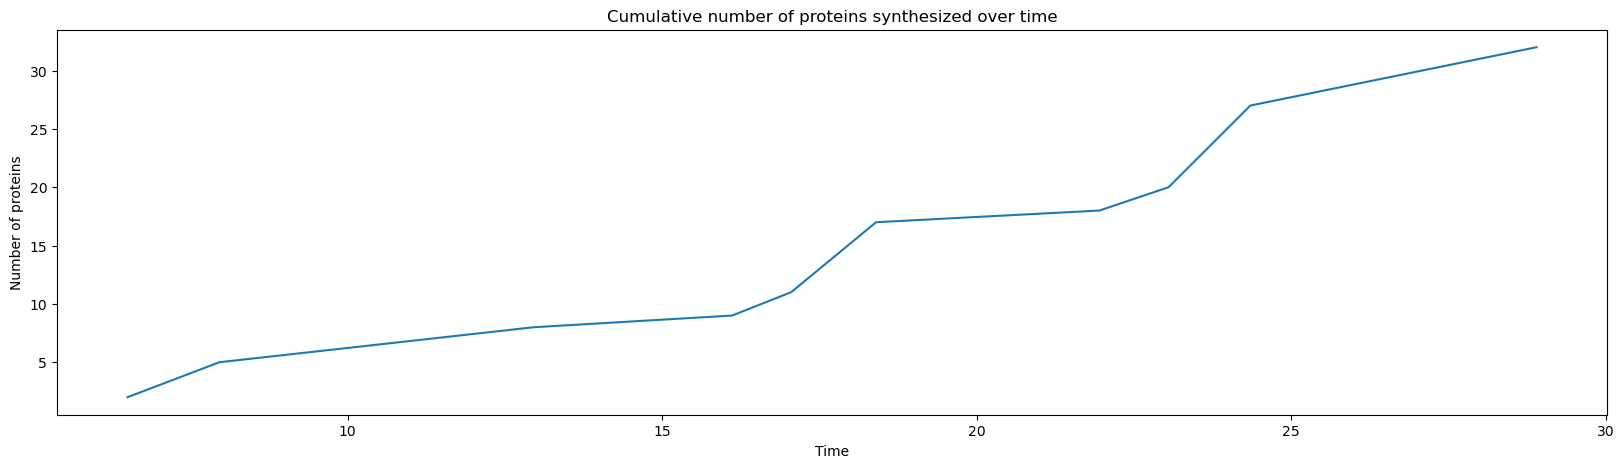

In [11]:
plot_cumulative_proteins_number_over_time(results_df)